In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('C:\\Users\\Hardik\\Desktop\\ML_Pipeline\\02-logistic-regression-heart\\heart_cleveland_upload.csv')  # download from Kaggle first
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [5]:
print("\nData types:\n", df.dtypes)


Data types:
 age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object


In [6]:
categorical_features = ['cp', 'thal', 'slope']
print("\nCategorical features:\n", categorical_features)


Categorical features:
 ['cp', 'thal', 'slope']


In [7]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [9]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [10]:
print("\nProcessed data shape:", df_encoded.shape)
df_encoded.head()


Processed data shape: (297, 18)


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,condition,cp_1,cp_2,cp_3,thal_1,thal_2,slope_1,slope_2
0,1.600302,1,1.596266,-0.257179,1,2,-0.812095,0,-0.820813,1,0,False,False,False,False,False,True,False
1,1.600302,0,0.468418,-0.160859,0,0,0.061157,0,0.639470,2,0,False,False,False,False,False,False,False
2,1.268242,0,1.032342,-0.411292,0,0,-1.554358,0,1.326662,0,0,False,False,False,False,False,False,True
3,1.157555,1,0.355633,0.667499,1,2,1.065396,0,0.295874,1,1,False,False,False,False,False,True,False
4,1.046868,1,-1.223355,-0.700254,0,2,-0.244481,1,0.639470,0,0,False,False,False,False,False,True,False


In [20]:
print(df.columns.tolist())



['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


In [21]:
print(df.columns.tolist())


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


In [22]:
X = df.drop('condition', axis=1)
y = df['condition']


In [24]:
print(y.value_counts())


condition
0    160
1    137
Name: count, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [28]:
y_pred = model.predict(X_test_scaled)


Accuracy Score: 0.9166666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



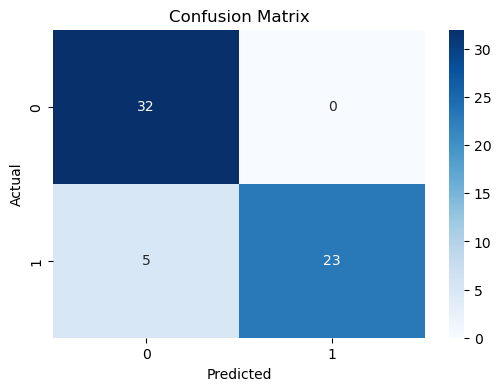

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize and save
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Save the image
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')  # Save with high resolution

plt.show()


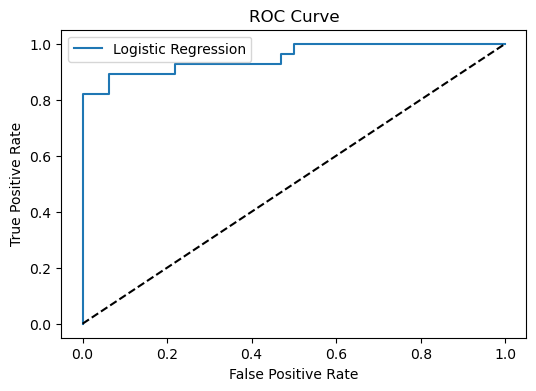

AUC Score: 0.953125


In [30]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal (random chance)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Save the image
plt.savefig("roc_curve.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print AUC Score
print("AUC Score:", roc_auc_score(y_test, y_prob))
